In [2]:
""" Starting  packages import (copy-paste) """
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import matplotlib.pylab as plt
import jetset
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED

# 1. Import data and shaping

## 1.1 Importing the SED data from the observation started at 56302 (MJD) or 10.01.2013

In [3]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56302.ecsv'))

## 1.2 Preliminary plot of the data and rebinning (standard) 


***  binning data  ***
---> N bins= 86
---> bin_widht= 0.2



/home/aramis/miniconda3/envs/jetset/lib/python3.7/site-packages/astropy/table/table.py:1195: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


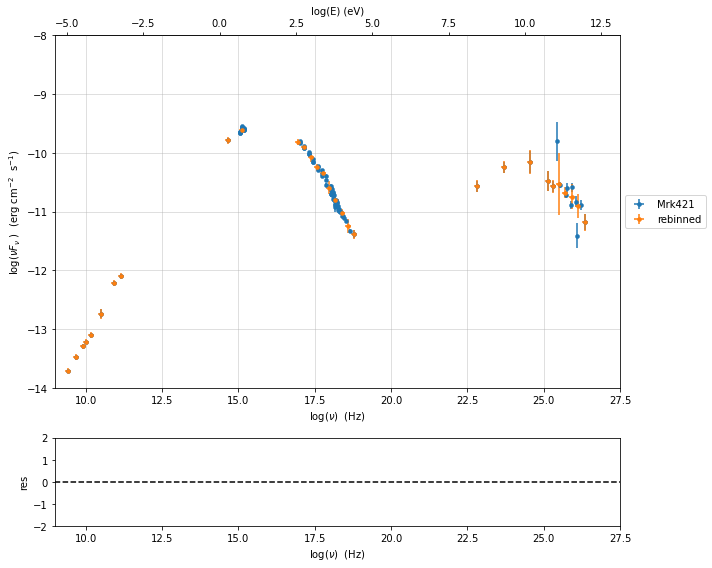

In [4]:
# Plot data
myPlot=sed_data.plot_sed()

# Data rebin in bins of 10^{0.2} [Hz]
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])

# Plotting rebinned data
myPlot.add_data_plot(sed_data,label='rebinned')

# Standard rescale that will be kept for the different pre-fits and fits
myPlot.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 1.3 First shaping for different bands (expected power law, report section 2.2.2)


*** evaluating spectral indices for data ***


*** SEDShape values ***
---> spectral inidces values
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.177607e+00, err=3.432730e-02 
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-8.992286e-01, err=4.185222e-02 
---> name = mm_IR            range=[10.500,13.500] log(Hz)  photon.val=-1.034552e+00, err=2.211796e-01 
---> name = IR_Opt           range=[13.000,14.000] log(Hz)  photon.val=No           , err=No           
---> name = Opt_UV           range=[13.000,17.000] log(Hz)  photon.val=-2.051965e+00, err=7.468457e-02 
---> name = BBB              range=[14.000,17.000] log(Hz)  photon.val=-2.051965e+00, err=7.468457e-02 
---> name = UV_X             range=[15.000,17.500] log(Hz)  photon.val=-2.154527e+00, err=4.596420e-02 
---> name = X                range=[16.000,19.000] log(Hz)  photon.val=-2.868797e+00, err=3.336347e-02 
---> name = Fermi            range=[22.380,25.380] log(Hz)  photon.

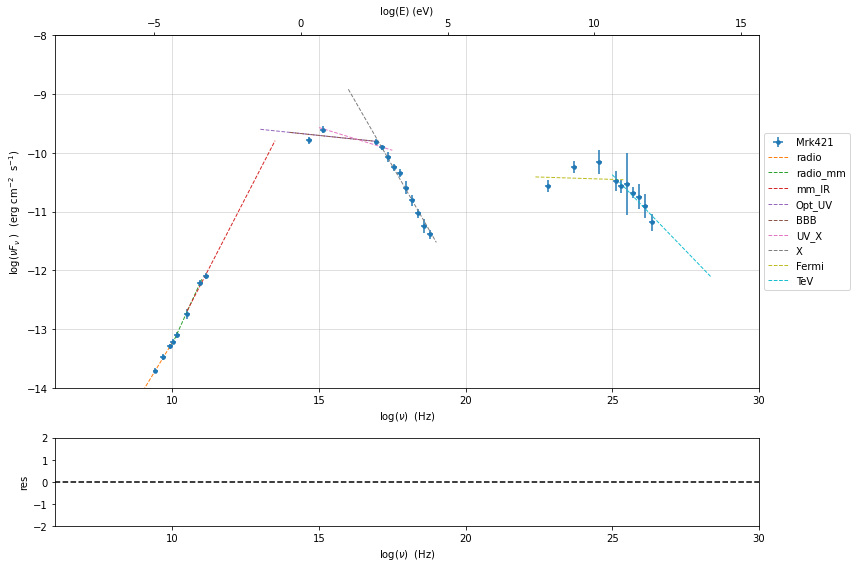

In [5]:
from jetset.sed_shaper import  SEDShape

# Selecting the SED data to shape
my_shape=SEDShape(sed_data)

# Indices evaluation
my_shape.eval_indices(silent=True)

# Plot the shaping
p=my_shape.plot_indices()

# Rescale with standard axis size
p.rescale(y_min=-14,y_max=-8)

# Show spectral indices
my_shape.show_values()

# 2. Separed fits and prefit

## 2.1 Fit with Synchrotron and Inverse Compton bumps (separated), without considering any galactic contribution to the flux. For further information about logparep, see:
### <i>E. Massaro, A. Tramacere et al., Log-parabolic spectra and particle acceleration in blazars, A&A 448, 861–871 (2006)<i>


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [9, 19.5]
---> class:  HSP



  model name  name  bestfit val     err +     err -   start val   fit range min fit range max frozen
------------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
LogParabolaEp    b -1.200855e-01 2.333264e-03    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
LogParabolaEp   Ep  1.537950e+01 3.438911e-02    --  1.568840e+01  0.000000e+00  3.000000e+01  False
LogParabolaEp   Sp -9.698662e+00 2.871215e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> sync       nu_p=+1.537950e+01 (err=+3.438911e-02)  nuFnu_p=-9.698662e+00 (err=+2.871215e-02) curv.=-1.200855e-01 (err=+2.333264e-03)


*** Log-Polynomial fitting of the IC component ***
---> fit range: [22.5, 27]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fi

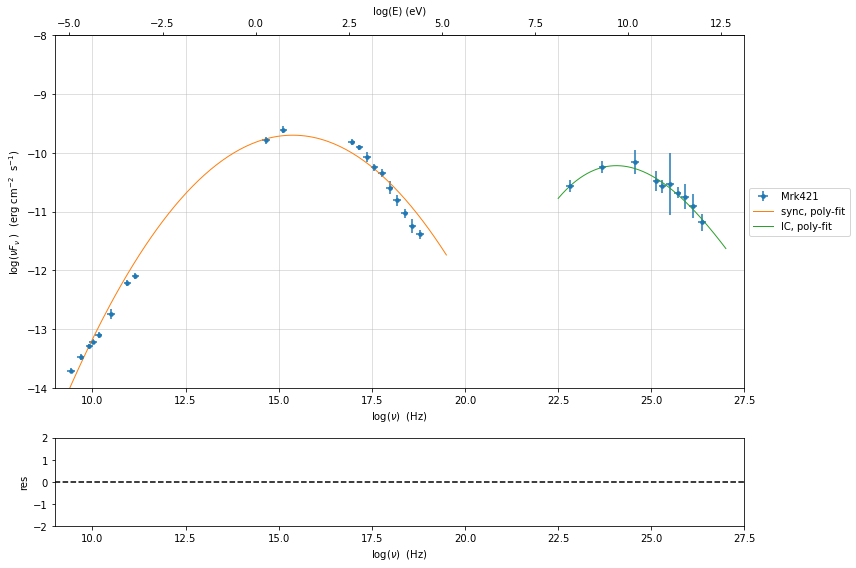

In [6]:
# Chosing best fit 1 with minuit (first line for synchrotron, second line for IC)
mm,best_fit1_minuit=my_shape.sync_fit(check_host_gal_template=False,  Ep_start=None, minimizer='minuit', silent=True, fit_range=[9,19.5], use_log_par=True)
my_shape.IC_fit(fit_range=[22.5,27],minimizer='minuit')


# Plot fit 
p=my_shape.plot_shape_fit()

# Standard rescaling
p.rescale(y_min=-14)
p.rescale(y_max=-8)
p.rescale(x_min=9)
p.rescale(x_max=27.5)

## 2.2 Prefit of the entire SED, by constraining 4 parameters with the chosen literature values (<i>Balokovic et al. 2016<i>). 

<i>The time duration of the measurement is said to be almost 12 hr, which is expressed with the time of 43200 sec. A model is built and saved as a .pkl file at the end of the prefit procedure.  <i>


***  constrains parameters from observable ***



/home/aramis/miniconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-linux-x86_64.egg/jetset/obs_constrain.py:481: RankWarning: Polyfit may be poorly conditioned
  B_from_nu_peaks,failed=constr_B_from_nu_peaks (jet_model,self.nu_p_S_obs,self.nu_p_IC_obs,self.rest_frame,self.B_min,self.B_max,self.beaming,params_grid_size,silent=silent)


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.342654e+03     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.055526e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.013698e+00     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.667340e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 6.004275e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.098232e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 2.804654e+16     1.000000e+03     1.000000e

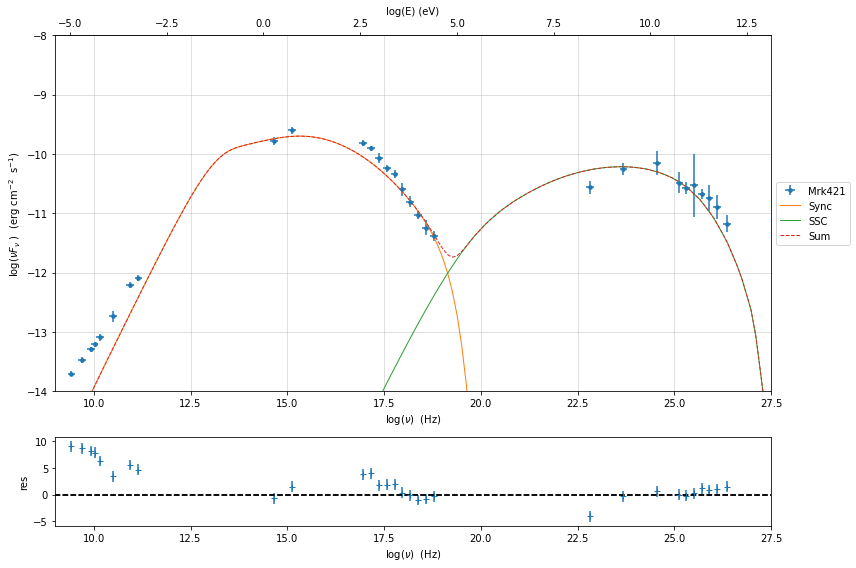

In [7]:
# Import constraining and model menager features
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel

# Constraining parameters of beaming, which is standardly fixed at 25 in Blaokovic et al., 
# fixing the max/ min range found in literature for all 4 epochs,
# 12 hr obsercation time
# nu cut at 10^{13}
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.05,0.3],
                        distr_e='lppl',
                        t_var_sec=43200,
                        nu_cut_IR=1E13,
                        SEDShape=my_shape)

# Creating a empty prefit with the constrained parameters (Synchrotron-self-Compton model used)
prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=True)

# Evaluating prefit
prefit_jet.eval()

# Inserting the data in a .pkl file
prefit_jet.save_model('prefit_jet_gal_templ.pkl')

# Prefit plot 
pl=prefit_jet.plot_model(sed_data=sed_data)

# Residual plot (chi)
pl.add_residual_plot(prefit_jet,sed_data)

# Standard
pl.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 2.3 Prefit parameters table

In [8]:
prefit_jet.parameters.par_table

name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,float64,bool,bool
gmin,low-energy-cut-off,lorentz-factor*,1.342654e+03,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,1.055526e+06,1.000000e+00,1.000000e+15,False,False
N,emitters_density,1 / cm3,1.013698e+00,0.000000e+00,--,False,False
s,LE_spectral_slope,,2.667340e+00,-1.000000e+01,1.000000e+01,False,False
r,spectral_curvature,,6.004275e-01,-1.500000e+01,1.500000e+01,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,1.098232e+04,1.000000e+00,1.000000e+09,False,False
R,region_size,cm,2.804654e+16,1.000000e+03,1.000000e+30,False,False
R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
B,magnetic_field,G,6.181648e-02,0.000000e+00,--,False,False


## 2.4 Writing down prefit parameters in a new model MRK421_56392

In [9]:
from jetset.jet_model import Jet
jet_MRK421_56302=Jet.load_model('prefit_jet_gal_templ.pkl')

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.342654e+03     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.055526e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.013698e+00     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.667340e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 6.004275e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.098232e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 2.804654e+16     1.000000e+03     1.000000e

# 3. Broadband SED fit

## 3.1 Lsb minimizer fit, with range setting according to chosen literature (<i>Balokovic et al. 2016<i>). 

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.342654e+03     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.055526e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.013698e+00     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.667340e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 6.004275e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.098232e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 2.804654e+16     1.000000e+03     1.000000e

/home/aramis/miniconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-linux-x86_64.egg/jetset/model_manager.py:160: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


\ minim function calls=40, chisq=225.912584 UL part=-0.000000
fit run: 1
| minim function calls=50, chisq=92.623932 UL part=-0.0000000
fit run: 2
/ minim function calls=50, chisq=53.978729 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-lsb
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 7.897223e+02     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 1.064498e+06     1.000000e+00     1.000000e+15 False  False
jet_leptonic                N    emitters_density         1 / cm3 7.472503e-01     0.000000e+00               -- False  False
jet_leptonic                

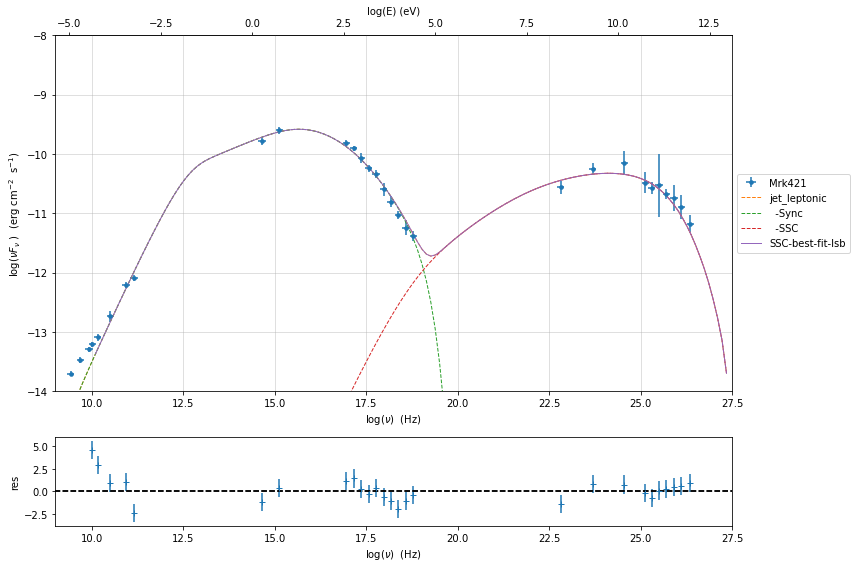

In [10]:
# Import minimizers
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel

# Loading model from prefit
jet_lsb=Jet.load_model('prefit_jet_gal_templ.pkl')

# Choosing grid size
jet_lsb.set_gamma_grid_size(200)

# Declaring the fit "fit_model_lsb" and its denomination (graph)
fit_model_lsb=FitModel(jet=jet_lsb, name='SSC-best-fit-lsb',template=None) 
# Freezing the redshift
fit_model_lsb.freeze(jet_lsb,'z_cosm')
# Freezing region position
fit_model_lsb.freeze(jet_lsb,'R_H')

# Choosing ranges for fit from chosen literature 
fit_model_lsb.jet_leptonic.parameters.beam_obj.fit_range=[5,80]
fit_model_lsb.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.jet_leptonic.parameters.gmax.fit_range=[1E5,1E7]
fit_model_lsb.jet_leptonic.parameters.gmin.fit_range=[10,1E4]
fit_model_lsb.jet_leptonic.nu_size=200
fit_model_lsb.jet_leptonic.IC_nu_size=100
fit_model_lsb.jet_leptonic._blob.adaptive_e_binning=0

# Model minimizer choosen lsb
model_minimizer_lsb=ModelMinimizer('lsb')

# Selecting best fit among the repetitions and creating the corresponding model
best_fit_lsb=model_minimizer_lsb.fit(fit_model_lsb,sed_data,1E10,1E29,fitname='SSC-best-fit-lsb',repeat=3)

# Plotting the fit along with the Mrk421 data
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)

# Evaluating the final model
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)

# Standard rescaling
p2.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 3.2 Lsb-fit parameters table

In [11]:
jet_lsb.parameters.par_table

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str16,str19,object,float64,float64,float64,bool,bool
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,7.897223e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.064498e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.472503e-01,0.000000e+00,--,False,False
jet_leptonic,s,LE_spectral_slope,,2.474881e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,r,spectral_curvature,,8.284579e-01,-1.500000e+01,1.500000e+01,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.560288e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,R,region_size,cm,3.469786e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,G,4.346918e-02,0.000000e+00,--,False,False


## 3.3 Modifying lsb fit with a minuit fit

filtering data in fit range = [1.000000e+10,1.000000e+29]
data length 27

*** start fit process ***
----- 
fit run: 0
\ minim function calls=360, chisq=48.556392 UL part=-0.00000000 UL part=-0.000000
fit run: 1
\ minim function calls=360, chisq=48.556392 UL part=-0.00000000 UL part=-0.000000
fit run: 2
\ minim function calls=360, chisq=48.556392 UL part=-0.00000000 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-lsb
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 7.895537e+02     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 1.087976e+06     1.000000e+00     1

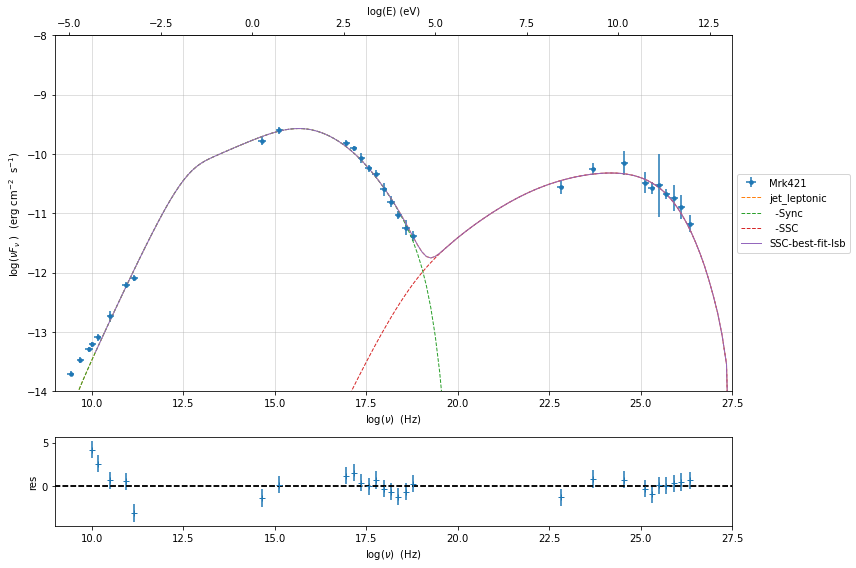

In [15]:
# Defining model minimizer
model_minimizer_minuit=ModelMinimizer('minuit')

# Defining best fit lsb --> minuit
best_fit_minuit=model_minimizer_minuit.fit(fit_model_lsb,sed_data,1E10,1E29,fitname='SSC-best-fit-lsb',repeat=3)

# Plotting fit (here "fit_model_lsb" corresponds to the fitted model modified by minuit minimizer)
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)

# Evaluating fit
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)

# Standard rescaling
p2.rescale(y_min=-14,y_max=-8,x_min=9,x_max=27.5)

## 3.4 Minuit-fit parameters table

In [16]:
best_fit_minuit.parameters.par_table

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str16,str19,object,float64,float64,float64,bool,bool
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,7.895537e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.087976e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,6.778274e-01,0.000000e+00,--,False,False
jet_leptonic,s,LE_spectral_slope,,2.455349e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,r,spectral_curvature,,8.569309e-01,-1.500000e+01,1.500000e+01,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.602680e+04,1.000000e+00,1.000000e+09,False,False
jet_leptonic,R,region_size,cm,3.574168e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,G,3.736752e-02,0.000000e+00,--,False,False
